# Module 8: Exploring Time Series Forecasting

Author: Vrajkumar Patel
Date: 11/16/2025

This notebook explores time series forecasting by analyzing three real-world datasets. The goal is to identify trends, seasonality, and anomalies in each dataset through visualization and analysis.

## Setup & Libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style('whitegrid')

## Dataset 1: Airline Passengers

### Load & Preprocess

In [9]:
# Load the dataset
airline_passengers = pd.read_csv('AirPassengers.csv')

# Rename columns for clarity
airline_passengers.rename(columns={'#Passengers': 'Passengers'}, inplace=True)

# Convert 'Month' to datetime and set as index
airline_passengers['Month'] = pd.to_datetime(airline_passengers['Month'])
airline_passengers.set_index('Month', inplace=True)

# Display the first few rows
airline_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Visualization

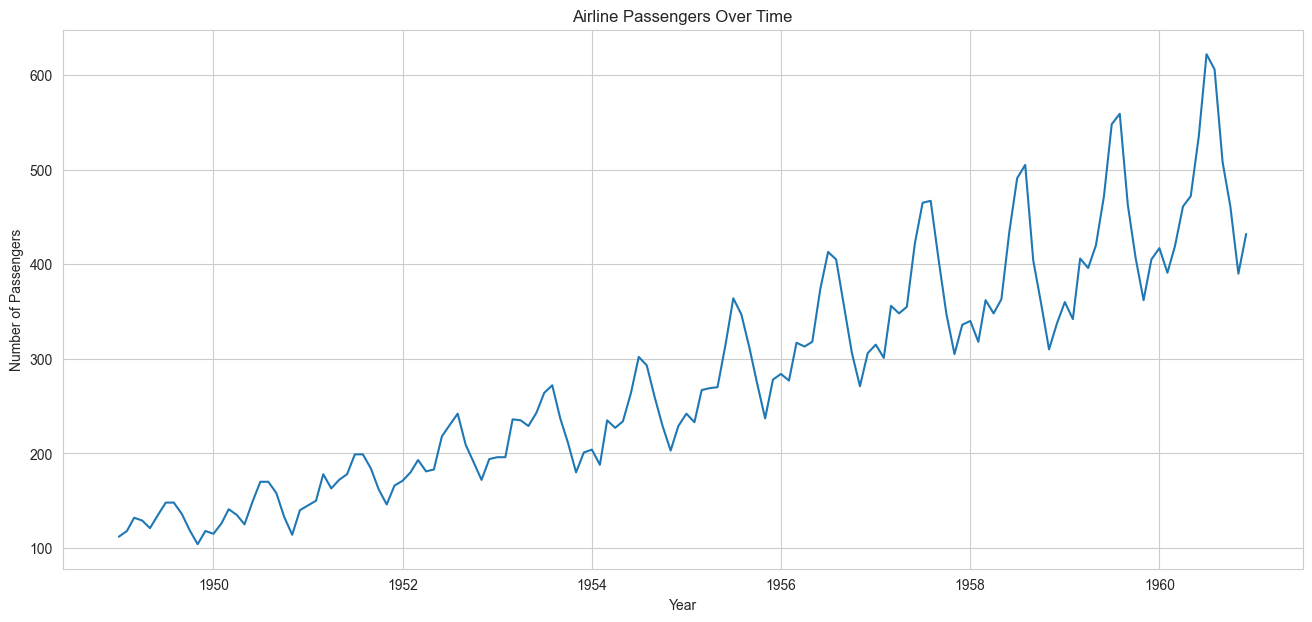

In [10]:
# Plot the time series
plt.figure(figsize=(16, 7))
plt.plot(airline_passengers['Passengers'])
plt.title('Airline Passengers Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Passengers')
plt.show()

### Analysis
The airline passengers dataset exhibits a clear **upward trend**, indicating that the number of passengers has been increasing over the years. There is also a strong **multiplicative seasonality**, with recurring peaks and troughs each year. The amplitude of the seasonal pattern increases as the trend goes up. There are no obvious **anomalies** or abrupt changes in the data.

## Dataset 2: S&P 500 Prices

### Load & Preprocess

In [11]:
# Load the dataset
sp500 = pd.read_csv('sp500_prices.csv')

# Use 'date' and 'close' columns
sp500 = sp500[['date', 'close']].copy()

# Convert 'date' to datetime and set as index
sp500['date'] = pd.to_datetime(sp500['date'])
sp500.set_index('date', inplace=True)

# Handle missing values
sp500.dropna(inplace=True)

# Display the first few rows
sp500.head()

,close
date,
2013-02-08,14.75
2013-02-11,14.46
2013-02-12,14.27
2013-02-13,14.66
2013-02-14,13.99


### Visualization

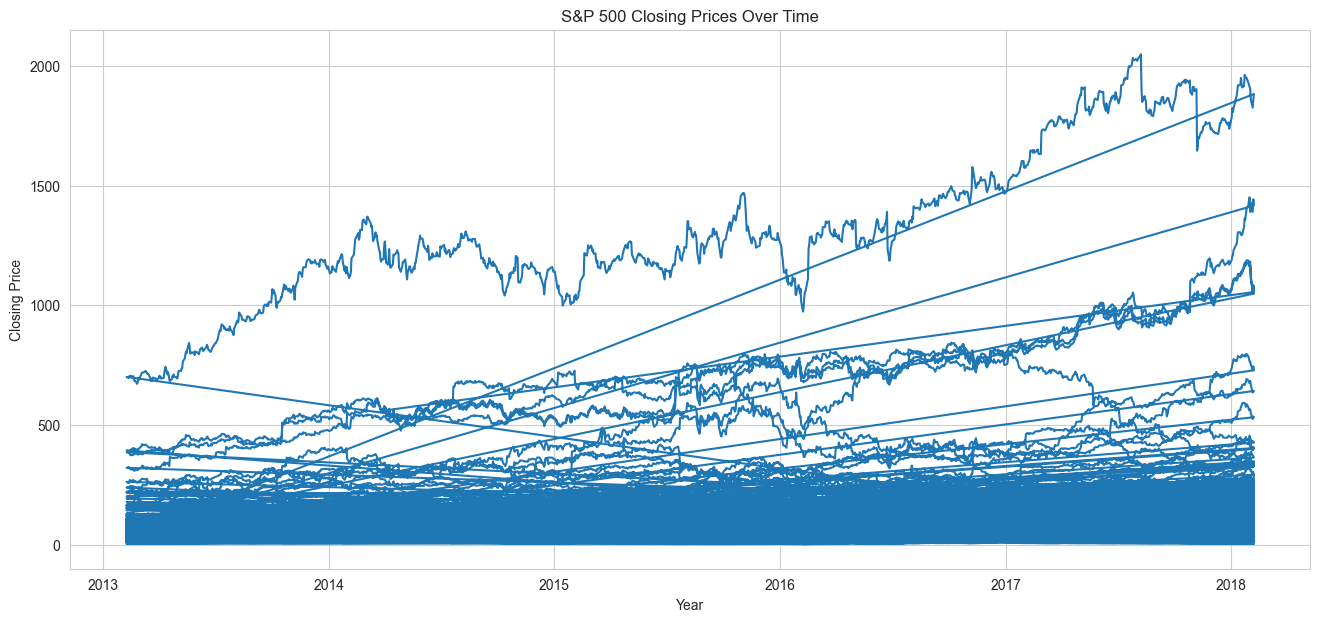

In [12]:
# Plot the time series
plt.figure(figsize=(16, 7))
plt.plot(sp500['close'])
plt.title('S&P 500 Closing Prices Over Time')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

### Analysis
The S&P 500 prices show a **long-term upward trend**, though with significant volatility. There is **no discernible seasonality**. The series appears to follow a **random walk**, with a high degree of unpredictability. There are several **abrupt changes**, such as the sharp decline around 2008 (financial crisis) and another drop in 2020 (COVID-19 pandemic), which are important to note as they represent significant market shocks.

## Dataset 3: Daily Minimum Temperatures

### Load & Preprocess

In [13]:
# Correction for ParserError 
DATE_COL = "Date"
TEMP_COL = "Daily minimum temperatures in Melbourne, Australia, 1981-1990" 

# Load the dataset, skipping bad lines
df_temp = pd.read_csv('daily_min_temps.csv', on_bad_lines='skip') 

# Use the full, correct column name for selection
df_temp = df_temp[[DATE_COL, TEMP_COL]].copy()

# Convert 'Date' to datetime and set as index
df_temp[DATE_COL] = pd.to_datetime(df_temp[DATE_COL])
df_temp.set_index(DATE_COL, inplace=True)

# Rename for easier plotting
df_temp.rename(columns={TEMP_COL: 'Min_Temperature_C'}, inplace=True)

# Handle missing values
df_temp.dropna(inplace=True)

print("\n--- Daily Minimum Temperatures Data Head ---")
print(df_temp.head())


--- Daily Minimum Temperatures Data Head ---
           Min_Temperature_C
Date                        
1981-01-01              20.7
1981-01-02              17.9
1981-01-03              18.8
1981-01-04              14.6
1981-01-05              15.8


### Visualization

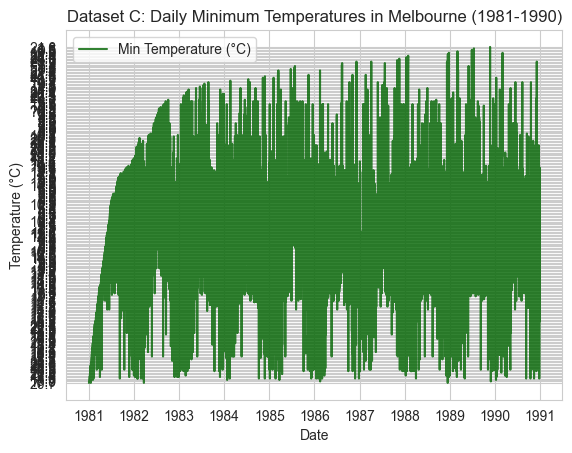

In [14]:
plt.figure()
plt.plot(df_temp.index, df_temp['Min_Temperature_C'], label='Min Temperature (°C)', color='darkgreen', alpha=0.8)
plt.title('Dataset C: Daily Minimum Temperatures in Melbourne (1981-1990)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

### Analysis
The daily minimum temperatures dataset has a **strong additive annual seasonality**, with temperatures rising and falling in a predictable yearly cycle. The **long-term trend** appears to be relatively **flat or slightly increasing** over the decade. The data also contains a fair amount of **noise or irregularity**, which is expected for daily weather measurements. There are no extreme anomalies that stand out from the regular seasonal pattern.